<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [15]:
print(df.columns)
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
}, axis=1, inplace=True)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


Data cleanup: using the process similar to the one in tutorial2 - skipping over the fine details

In [18]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)MI

<h2>Exploratory Data Analysis (EDA) </h2>

Chose Predictor for Test: **<Math for 8th Grade** ~~~(Ex. Math for 8th grade)~~~

~~~**(hit `Enter` to edit)**~~~

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [29]:
df["YEAR"].drop_duplicates().count()
# 33 different years

33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

Cleaning AVG_MATH_8_SCORE data

In [31]:
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

In [86]:
#df["STATE"].value_counts()
MI = df.loc[df['STATE'] == 'MICHIGAN']
OH = df.loc[df['STATE'] == 'OHIO']
mi_avg = MI['AVG_MATH_8_SCORE'].mean()
oh_avg = OH['AVG_MATH_8_SCORE'].mean()
print(mi_avg)
print(oh_avg)
# Ohio had the higher average predictor score

276.1666666666667
282.25


Find the average for your pedictor score across all states in 2019

In [161]:
states = df['STATE'].drop_duplicates().tolist()
avg = np.zeros(len(states))
k = 0
for state in states:
    S = df.loc[df['STATE'] == state]
    avg[k] = S['AVG_MATH_8_SCORE'].mean()
    k = k + 1
print(avg[0:5])
print(states[0:5])

[264.16666667 274.66666667 269.75       269.16666667 283.18181818]
['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO']


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [166]:
maximum = np.zeros(len(states))
k = 0
for state in states:
    S = df.loc[df['STATE'] == state]
    maximum[k] = S['AVG_MATH_8_SCORE'].max()
    k = k + 1
print(maximum[0:5])
print(states[0:5])

[269. 283. 279. 277. 292.]
['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO']


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [174]:
# Perhaps the state's profit (total revenue - total expenditure) per student can tell us some info
df['PROFIT_PER_STUDENT'] = (df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']) / df['ENROLL_ALL']

Final feature list: **PROFIT_PER_STUDENT**

Feature selection justification: **After taking 2 economic classes, profit is important to understanding whether or not a business (in this case, we can think of businesses as schools) will continue to stay in the competitive market. If they make profit, we can guess that it will stay and continue to do well. If they don't, we can expect some poor results.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, 'State Profits')

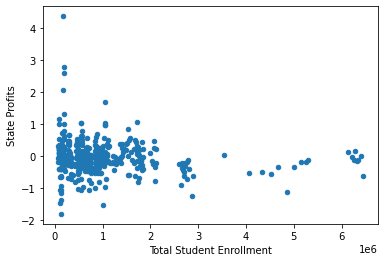

In [183]:
df.plot.scatter(x='ENROLL_ALL', y='PROFIT_PER_STUDENT')
plt.xlabel('Total Student Enrollment')
plt.ylabel('State Profits')

**Amount of students enrolled per state and the profit per student each state gets**

**Visualization 2**

Text(0.5, 1.0, 'State Profits Over Time Per Student Enrolled')

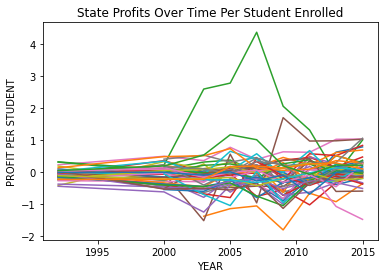

In [192]:
df.set_index('YEAR').groupby('STATE').PROFIT_PER_STUDENT.plot();
plt.ylabel('PROFIT PER STUDENT')
plt.title('State Profits Over Time Per Student Enrolled')

**Time graph of how much funding each state gets**

<AxesSubplot:xlabel='ENROLL_ALL', ylabel='PROFIT_PER_STUDENT'>

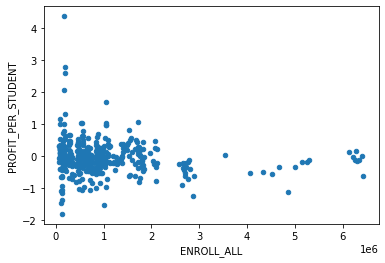

In [190]:
df.plot.scatter(x='ENROLL_ALL', y='PROFIT_PER_STUDENT')

**Comparison of state enrollment rate and the money they receive per student**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X = df[['ENROLL_8','PROFIT_PER_STUDENT','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=30, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [201]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [202]:
# create your model here
model = LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Users/kenny/Python/mdst/setup/env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'AVG MATH 8 SCORE')

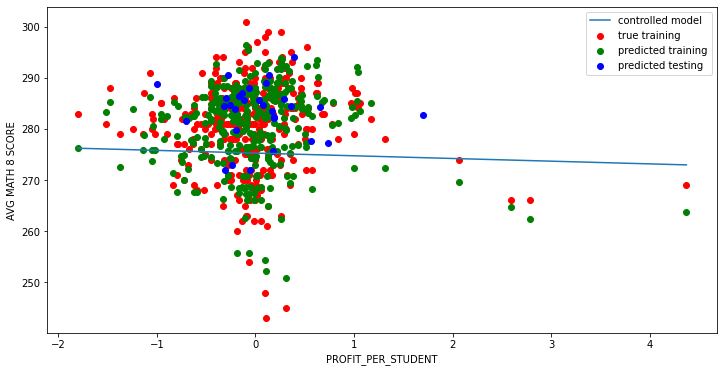

In [209]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'PROFIT_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG MATH 8 SCORE')

<h2> Summary </h2>

It seems that the amount of money the school has left over after spending (profit) has no effect on the students' math scores. I would have thought tbat if the school has money leftover, they could use that money to improve the school with school supplies or better classroom accessories. It would seem there is a negative correlation given the slight downward slope, but I belive that's due to variability in the data.
I suppose that schools don't really care about profits as much as businesses would since they receive funding based on enrollment size, but if student performance effects funding, then I would have assumed schools would want to try to work on performance by offering goods and services to help meet learning expectations.

Perhaps what I would explore next is the relationship between math scores and reading scores. My hypothesis is that if one of the score is high, the other is high. If not, then I would hypothesize that there is a discrepancy in school departments. Or I would investigate the trend from Grade 4 Math to Grade 8 Math. Hopefully there will be no negative trend, which would indicate the school is not doing well in teaching students math as the years go by.